# Thermostats 

## Berendsen Thermostat

The Berendsen Thermostat (BT) uses a tapered velocity scaling approach. In a strict velocity scaling approach
the temperature $T_e$ is estimated, through a quantity proportional to $\langle v^2 \rangle$,
and the velocities are scaled to values consistent with the desired temperature $T_d$,
as in $v_i \mapsto \alpha v_i$. Being completely consistent with physical laws,
it is preferable to use the same simple algorithm but more gently so that the dynamics during the thermostat period is more consistent with the underlying equations of motion.
In the BT we begin with an model for the temperature as we would like to see it evolve over a slower
timescale $\tau_{B}$. One model is

$$
   \frac{dT}{dt} = \frac{T_d - T}{\tau_{B}},
$$

This equation can be solved analytically to yield

$$
   T(t) = T(0)e^{-t/\tau_B} + \left(1 - e^{-t/\tau_B}  \right)T_d ,
$$

which can be seen to transition from the initial temperature $T(0)$ to the desired temperature $T_d$
on a time scale of $\tau_{B}$. By choosing $\tau_{B}$ to be many timesteps we can eventually equilibrate
the system while allowing it to explore configurations closer to the real (not velocity scaled) dynamics.

To implement BT we discretize the BT model across one time step to obtain

$$
   T(t + \Delta t) = T(t) + \frac{\Delta t}{\tau_B}\left(T_d - T(t) \right).
$$

We want to scale the current velocities such that this new temperature $T(t+\Delta t)$ is achieved,
because that the temperature prescribed by the BT.
Finding the ratio then of the target temperature and the current temperature, we get

$$
   \frac{T(t + \Delta t)}{T(t) } = 1+ \frac{\Delta t}{\tau_{B}}\left(\frac{T_d}{T(t) } - 1 \right).
$$

Taking the square root of this yields the scaling factor for the velocities:

$$
\alpha = \sqrt{ 1+ \frac{\Delta t}{\tau_{B}}\left(\frac{T_d}{T(t) } - 1 \right) }.
$$

Below we show an example notebook that runs Sarkas for different $\tau_B$ values.

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess

# Create the file path to the YAML input file
example_directory = os.path.join('..',
                                 os.path.join('sarkas',
                                              os.path.join('examples', 'Berendsen')))

input_file_name = os.path.join(example_directory, 'yocp_cgs_pp_therm.yaml' )



Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
preproc = PreProcess(input_file_name)
preproc.setup(read_yaml =True)
preproc.run()










 ____                     __                         
/\  _`\                  /\ \                        
\ \,\L\_\     __     _ __\ \ \/'\      __      ____  
 \/_\__ \   /'__`\  /\`'__\ \ , <    /'__`\   /',__\ 
   /\ \L\ \/\ \L\.\_\ \ \/ \ \ \\`\ /\ \L\.\_/\__, `\
   \ `\____\ \__/.\_\\ \_\  \ \_\ \_\ \__/.\_\/\____/
    \/_____/\/__/\/_/ \/_/   \/_/\/_/\/__/\/_/\/___/ 
                                                     
                                                     


An open-source pure-python molecular dynamics suite for non-ideal plasmas.



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Preprocessing                                  
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  tau_2
Job directory:  Berendsen_runs/tau_2

Equilibration dumps directory: 
 Berendsen_runs/tau_2/PreProcessing/Equilibration/dumps
Pr

  0%|          | 0/10 [00:00<?, ?it/s]

Time of a single equilibration step averaged over 10 steps: 
0 min 0 sec 141 msec 222 usec 741 nsec 



  0%|          | 0/10 [00:00<?, ?it/s]

Time of a single production step averaged over 10 steps: 
0 min 0 sec 21 msec 70 usec 587 nsec 



----------------------- Total Estimated Times ------------------------ 


Equilibration Time: 0 hrs 11 min 46 sec

Production Time: 0 sec 0 msec 0 usec 0 nsec

Total Run Time: 0 hrs 11 min 46 sec


========================= Filesize Estimates ========================= 


Equilibration:

Checkpoint filesize: 0 GB 0 MB 83 KB 470 bytes
Checkpoint folder size: 0 GB 203 MB 775 KB 472 bytes

Production:

Checkpoint filesize: 0 GB 0 MB 83 KB 470 bytes
Checkpoint folder size: 0 GB 0 MB 0 KB 0 bytes

Total minimum needed space: 0 GB 203 MB 775 KB 472 bytes


We select six different values of $\tau_B$ and for each of them run a simulation.

In [3]:
taus = np.array([ 1.0, 2.0, 5.0, 10., 50., 100. ])

for i, tau in enumerate(taus):
    args = {
        'Thermostat': {'relaxation_timestep': 100, 
                       'berendsen_tau': tau}, # Change tau for each simulation
            
            "IO":   # Store all simulations' data in simulations_dir,
                # but save the dumps in different subfolders (job_dir)
            {
                "simulations_dir": 'Berendsen_runs',
                "job_dir": "tau_{}".format(int(tau) ),
                "verbose": False # This is so not to print to screen for every run
            },
    }
    # Run the simulation.
    sim = Simulation(input_file_name)
    sim.setup(read_yaml=True, other_inputs=args)
    sim.run()
    
    print('Tau = {} Done'.format(tau))

Tau = 1.0 Done
Tau = 2.0 Done
Tau = 5.0 Done
Tau = 10.0 Done
Tau = 50.0 Done
Tau = 100.0 Done


Now we plot the temperature evolution to show the effect of changing $\tau_B$.

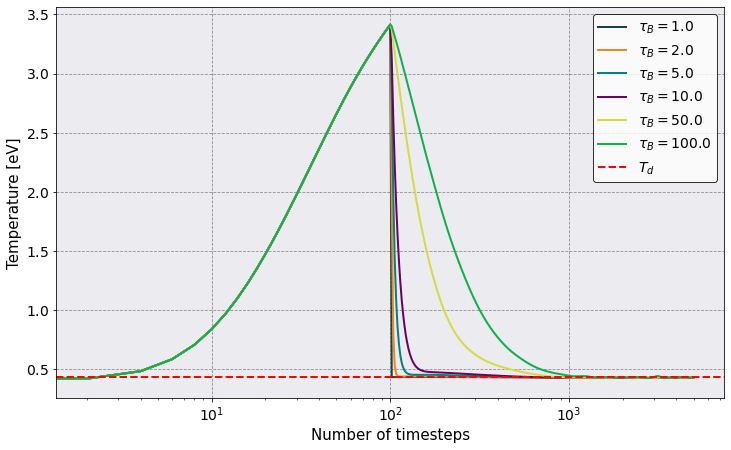

In [4]:
fig, axt = plt.subplots(1,1, figsize = (12,9))

for i, tau in enumerate(taus):
    args = {
        'Thermostat': {'relaxation_timestep': 100, 
                       'berendsen_tau': tau}, # Change tau for each simulation
            
            "IO":   # Store all simulations' data in simulations_dir,
                # but save the dumps in different subfolders (job_dir)
            {
                "simulations_dir": 'Berendsen_runs',
                "job_dir": "tau_{}".format(int(tau) ),
                "verbose": False # This is so not to print to screen for every run
            },
    }

    postproc = PostProcess(input_file_name)
    postproc.setup(read_yaml=True, other_inputs = args)
    postproc.therm.setup(postproc.parameters, phase = 'equilibration')
    postproc.therm.parse()
    
    postproc.therm.plot(
        scaling = (postproc.therm.dt, postproc.parameters.eV2K),   
        y = 'Temperature', 
        ylabel = 'Temperature [eV]',
        xlabel = 'Number of timesteps', logx = True, ax = axt)

axt.axhline(postproc.thermostat.temperatures_eV[0], ls = '--', color = 'r')
axt.legend([
    r'$\tau_B = 1.0$', 
    r'$\tau_B = 2.0$',
    r'$\tau_B = 5.0$',
    r'$\tau_B = 10.0$',
    r'$\tau_B = 50.0$',
    r'$\tau_B = 100.0$',
    r'$T_d$'])

As you can see, the temperature increase for the first hundred time steps. The reason being that we selected the option `relaxation_timestep: 100`. We do this to allow the system to transform all of its initial potential energy into kinetic energy. 